In [3]:
import os
import keras
import numpy as np

from data_generator.data_generator import COCODataLoader
from models.mobilenet_unet import MobilenetV2_base, relu6

import skimage.io as io
import matplotlib.pyplot as plt

In [2]:
mobilenet = MobilenetV2_base()
mobilenet.build_model(keras.layers.Input(shape=(224,224,3)))

mobilenet.model = keras.models.load_model('./checkpoints/mobilenet-05_loss-0.2286_val_loss-0.2250.h5',
                                              custom_objects={'relu6' : relu6})


Building MobileNet_V2...
Building encoder...
Loading weights from /home/matsvei.rozanau/.keras/models/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5

Building decoder...
Block: 25
(?, 7, 7, 64) (?, 14, 14, 64)
Block: 28
(?, 14, 14, 64) (?, 28, 28, 32)
Block: 31
(?, 28, 28, 32) (?, 56, 56, 24)
Block: 33
(?, 56, 56, 24) (?, 112, 112, 16)
Block: 34
(?, 112, 112, 16) (?, 224, 224, 3)


In [4]:
val_generator = COCODataLoader(
                    path_to_annotations='/home/matsvei.rozanau/hdd/datasets/coco_dataset/annotations/instances_val2017.json',
                    path_to_images='/home/matsvei.rozanau/hdd/datasets/coco_dataset/val2017/',
                    batch_size=32,
                    resize=(224,224),
                    augmentations=True)

loading annotations into memory...
Done (t=0.30s)
creating index...
index created!


In [5]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Original image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Predicted mask', fontsize=fontsize)

In [12]:
images, masks = val_generator[20]
masks = np.squeeze(masks)

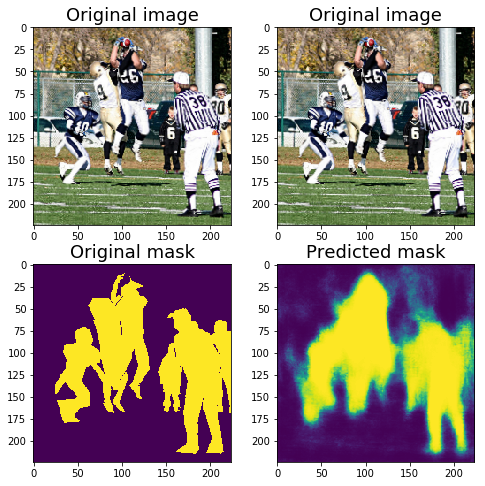

In [50]:
idx = 29
pred_mask = np.squeeze(mobilenet.model.predict(np.expand_dims(images[idx], axis=0)))
visualize(images[idx], pred_mask, images[idx], masks[idx])